In [32]:
import torch
import librosa
from matplotlib import pyplot as plt
import numpy as np
import IPython.display as ipd
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

A method to easily load audio and visually debug were necessary

In [17]:
def load_audio(path, show=False):
    # sampling rate at 16000Hz wrt flickr_audio
    x1, sr1 = librosa.load(os.path.join(path), sr=16000) 

    if(show):
        ipd.display(ipd.Audio(os.path.join(path)))
        
        t1 = np.arange(x1.shape[0]) / sr1
        plt.figure(figsize=(10, 2))
        plt.plot(t1, x1, color='gray')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Amplitude')
        plt.xlim([t1[0], t1[-1]])
        plt.tight_layout()
        
    return x1, sr1

A test of what the audio sounds like

(array([0.        , 0.        , 0.        , ..., 0.00735474, 0.00662231,
        0.00732422], dtype=float32),
 16000)

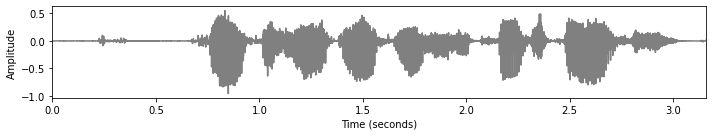

In [19]:
load_audio('flickr_audio/flickr_audio/wavs/2110692070_8aaaa1ae39_4.wav', show=True)

Path definitions

In [25]:
data = 'flickr_audio/flickr_audio/wavs/'
annotations = 'flickr_audio/flickr_audio/wav2spk.txt'

Loading data annotations and seeing how many audio files per speaker

In [55]:
from io import StringIO

s = StringIO(u"1,1.3,abcde")
speaker_annotations = np.genfromtxt(annotations, dtype=[('mystring','S27'),('myint','i8')], delimiter=' ')

print('wav file', '\t\t\t    speaker id')
for i in range(20):
    print(speaker_annotations[i][0], '\t\t', speaker_annotations[i][1])

wav file 			    speaker id
b'2571096893_694ce79768_1.wav' 		 1
b'2571096893_694ce79768_2.wav' 		 2
b'2570559405_dc93007f76_4.wav' 		 3
b'2571096893_694ce79768_0.wav' 		 4
b'2572101672_4d699c8713_0.wav' 		 4
b'2572101672_4d699c8713_1.wav' 		 5
b'2571096893_694ce79768_3.wav' 		 6
b'2571096893_694ce79768_4.wav' 		 7
b'2572101672_4d699c8713_2.wav' 		 8
b'2572101672_4d699c8713_3.wav' 		 9
b'2198484810_50a893824a_2.wav' 		 10
b'2198484810_50a893824a_3.wav' 		 11
b'3063544435_10516c6937_3.wav' 		 12
b'3063544435_10516c6937_2.wav' 		 13
b'3063544435_10516c6937_1.wav' 		 14
b'3063544435_10516c6937_0.wav' 		 15
b'306318683_5f1f875191_4.wav' 		 16
b'306318683_5f1f875191_3.wav' 		 4
b'306318683_5f1f875191_2.wav' 		 17
b'306318683_5f1f875191_1.wav' 		 18


In [67]:
from collections import Counter

speakers = Counter() # store count of songs per speaker
for x in speaker_annotations:
    speakers[x[1]] += 1
    
# Computing quick average, max, and min
counts = [count for n, count in speakers.items()]
print('average', sum(counts) / len(speakers))
print('max', max(counts))
print('min', min(counts))

speakers

average 218.5792349726776
max 2978
min 4


Counter({1: 68,
         2: 557,
         3: 642,
         4: 1690,
         5: 2197,
         6: 837,
         7: 2978,
         8: 41,
         9: 394,
         10: 476,
         11: 858,
         12: 69,
         13: 107,
         14: 570,
         15: 53,
         16: 809,
         17: 2466,
         18: 263,
         19: 1050,
         20: 351,
         21: 361,
         22: 247,
         23: 313,
         24: 369,
         25: 485,
         26: 99,
         27: 305,
         28: 226,
         29: 40,
         30: 543,
         31: 49,
         32: 195,
         33: 1132,
         34: 159,
         35: 40,
         36: 349,
         37: 363,
         38: 364,
         39: 205,
         40: 151,
         41: 214,
         42: 618,
         43: 353,
         44: 136,
         45: 418,
         46: 1472,
         47: 89,
         48: 109,
         49: 1070,
         50: 49,
         51: 134,
         52: 704,
         53: 173,
         54: 138,
         55: 164,
         56: 27,
    

Speakers 7 and 17 seem to have the most audio. Let's here them

(array([ 6.1035156e-05,  3.0517578e-05, -6.1035156e-04, ...,
         2.4414062e-04, -8.2397461e-04,  2.7465820e-04], dtype=float32),
 16000)

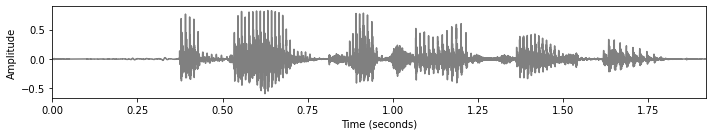

In [60]:
load_audio('flickr_audio/flickr_audio/wavs/2867026654_38be983b44_2.wav', show=True)  # speaker 7

(array([-1.2207031e-04, -9.1552734e-05, -9.1552734e-05, ...,
         6.1035156e-05, -2.1362305e-04, -2.7465820e-04], dtype=float32),
 16000)

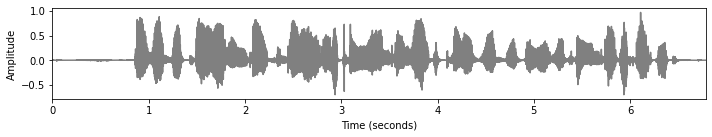

In [61]:

load_audio('flickr_audio/flickr_audio/wavs/3533451027_b078e4631b_3.wav', show=True)  # speaker 17

Well they are both male. The best course of action to use this data is interesting. I will consider the following questions:

- Should I map male to female and vice versa via all the speakers? That would certainly provide the most data - but would it be useful? 

- Should I map all voices to one voice? That would definetely be an interesting case, target domain might suffer from relatively less data though. In such a case I should focus on voices with the largest number of data.

- Should I map one speaker to another in all combinations? Female to Male. Male to Female. Female to Female. Male to Male. That may be exhaustive, but maybe less expensive than the mapping all voices to once voice problem. The limitation here is that with 1 to 1 mappings lack  of data is something to consider. There seems to be a count gap between male and female.